In [0]:
#persistence forecasting

In [0]:
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from google.colab import files

In [2]:

#upload the data
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Sales.csv to Sales.csv
User uploaded file "Sales.csv" with length 1619 bytes


In [0]:

def parser(x):
	return datetime.strptime(x, '%Y-%m')

In [12]:
series = pd.read_csv("Sales.csv",header=0, index_col=0, squeeze=True)
series.head()

Month
1960-01     6550
1960-02     8728
1960-03    12026
1960-04    14395
1960-05    14587
Name: Sales, dtype: int64

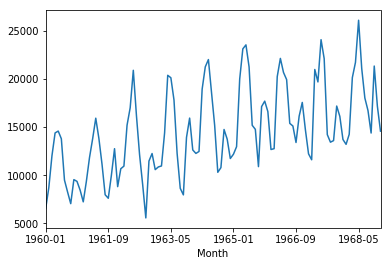

In [13]:
series.plot()
pyplot.show()

In [22]:
from pandas import DataFrame
from pandas import concat
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

       t-1    t+1
0      NaN   6550
1   6550.0   8728
2   8728.0  12026
3  12026.0  14395
4  14395.0  14587


In [0]:
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [0]:
#@title from the below graph,it is clear that the model is 1 step behind the real observation. Theres noise in the graph of sales   


Test MSE: 13356460.486


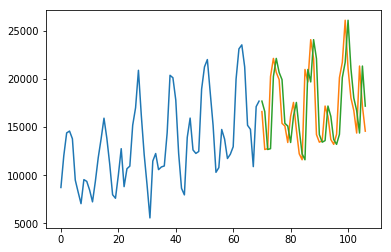

In [26]:
 #persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
 
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()